In [40]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv("jfreechart-test-stats.csv")

In [3]:
df

,class,TLOC,WMC,TASSERT
0,./src/test/java/org/jfree/chart/annotations/Ca...,107,8,27
1,./src/test/java/org/jfree/chart/annotations/Ca...,96,8,30
2,./src/test/java/org/jfree/chart/annotations/Ca...,61,8,14
3,./src/test/java/org/jfree/chart/annotations/Te...,92,12,22
4,./src/test/java/org/jfree/chart/annotations/XY...,141,8,21
...,...,...,...,...
346,./src/test/java/org/jfree/data/xy/YIntervalDat...,53,10,18
347,./src/test/java/org/jfree/data/xy/YIntervalSer...,90,11,13
348,./src/test/java/org/jfree/data/xy/YIntervalSer...,158,13,47
349,./src/test/java/org/jfree/data/xy/YIntervalTes...,35,8,9


In [4]:
df = df.rename(columns={" WMC": "WMC", " TASSERT": "TASSERT"})

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3fe8e9ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3fefab340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3fe8e99a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3fefab820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3fefabaf0>],
 'means': []}

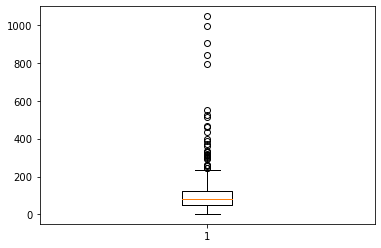

In [5]:
plt.boxplot(df['TLOC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3800a4c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3800b4250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3800a4940>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3800b47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3800b4ac0>],
 'means': []}

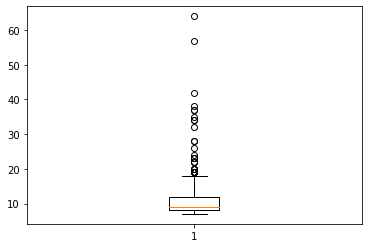

In [6]:
plt.boxplot(df['WMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3801193d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d380119970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3801190d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d380119f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d380125220>],
 'means': []}

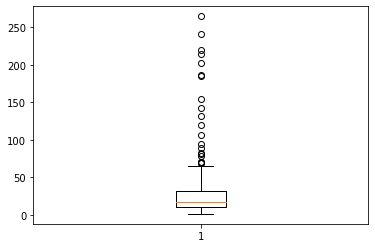

In [7]:
plt.boxplot(df['TASSERT'])

In [8]:
df.columns

Index(['class', 'TLOC', 'WMC', 'TASSERT'], dtype='object')

In [9]:
median_tloc = df['TLOC'].median()
median_wmc = df['WMC'].median()
median_tassert = df['TASSERT'].median()

#U
upper_median_tloc = df[df['TLOC'] > median_tloc]['TLOC'].median()
upper_median_wmc = df[df['WMC'] > median_wmc]['WMC'].median()
upper_median_tassert = df[df['TASSERT'] > median_tassert]['TASSERT'].median()

#I
lower_median_tloc = df[df['TLOC'] < median_tloc]['TLOC'].median()
lower_median_wmc = df[df['WMC'] < median_wmc]['WMC'].median()
lower_median_tassert = df[df['TASSERT'] < median_tassert]['TASSERT'].median()

#1.5d
range_tloc = 1.5 * (upper_median_tloc - lower_median_tloc)
range_wmc = 1.5 * (upper_median_wmc - lower_median_wmc)
range_tassert = 1.5 * (upper_median_tassert - lower_median_tassert)

#Filter TLOC columns
df = df[(df['TLOC'] < upper_median_tloc + range_tloc) & (df['TLOC'] > lower_median_tloc - range_tloc)]

#Filter WMC columns
df = df[(df['WMC'] < upper_median_wmc + range_wmc) & (df['WMC'] > lower_median_wmc - range_wmc)]

#Filter TASSERT columns
df = df[(df['TASSERT'] < upper_median_tassert + range_tassert) & (df['TASSERT'] > lower_median_tassert - range_tassert)]



(array([ 2., 17., 29., 39., 28., 34., 18., 32., 30., 23.,  5.,  9.,  9.,
         6., 10.,  8.,  2.,  1.,  1.,  2.]),
 array([  3.,  14.,  25.,  36.,  47.,  58.,  69.,  80.,  91., 102., 113.,
        124., 135., 146., 157., 168., 179., 190., 201., 212., 223.]),
 <BarContainer object of 20 artists>)

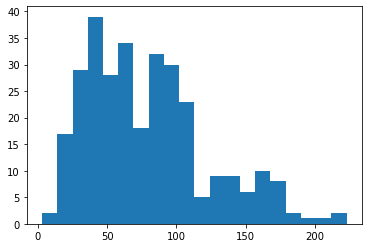

In [10]:
plt.hist(df['TLOC'], bins=20)

(array([  8.,   0., 120.,   0.,  54.,   0.,  35.,   0.,  36.,   0.,  18.,
          0.,  11.,   0.,   7.,   0.,   5.,   0.,   7.,   4.]),
 array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
        12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ]),
 <BarContainer object of 20 artists>)

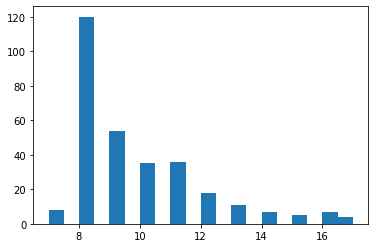

In [11]:
plt.hist(df['WMC'], bins=20)

(array([29., 31., 35., 37., 36., 46., 16., 11., 10., 11.,  9., 12.,  4.,
         1.,  5.,  5.,  3.,  1.,  2.,  1.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ,
        36.2, 39.4, 42.6, 45.8, 49. , 52.2, 55.4, 58.6, 61.8, 65. ]),
 <BarContainer object of 20 artists>)

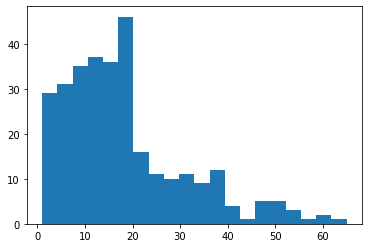

In [13]:
plt.hist(df['TASSERT'], bins=20)

Corrélation entre TLOC et TASSERT: 0.7668497586390084


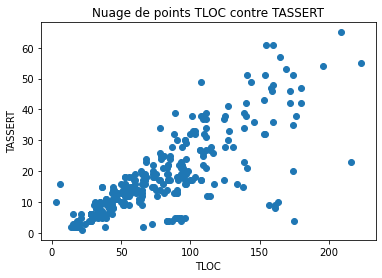

In [46]:
#Corrélation TLOC et WMC
plt.scatter(x=df['TLOC'], y=df['TASSERT'])

plt.xlabel('TLOC')
plt.ylabel('TASSERT')
plt.title('Nuage de points TLOC contre TASSERT')

corr = df['TLOC'].corr(df['TASSERT'], method="spearman")

print("Corrélation entre TLOC et TASSERT: " + str(corr))

Corrélation entre TLOC et TASSERT: 0.4551658388367608


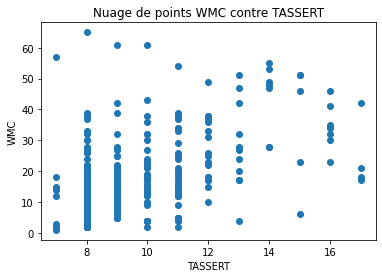

In [47]:
#Corrélation WMC et TASSERT
plt.scatter(x=df['WMC'], y=df['TASSERT'])

plt.xlabel('TASSERT')
plt.ylabel('WMC')
plt.title('Nuage de points WMC contre TASSERT')

corr = df['WMC'].corr(df['TASSERT'], method="spearman")

print("Corrélation entre TLOC et TASSERT: " + str(corr))






In [45]:
# Régression linéaire TLOC vs TASSERT
model_TLOC_TASSERT = LinearRegression()
X_TLOC = df[['TLOC']]
y_TASSERT = df['TASSERT']
model_TLOC_TASSERT.fit(X_TLOC, y_TASSERT)
coefficient_TLOC_TASSERT = model_TLOC_TASSERT.coef_

# Régression linéaire WMC vs TASSERT
model_WMC_TASSERT = LinearRegression()
X_WMC = df[['WMC']]
y_TASSERT = df['TASSERT']
model_WMC_TASSERT.fit(X_WMC, y_TASSERT)
coefficient_WMC_TASSERT = model_WMC_TASSERT.coef_

print(f"Coefficient de régression entre TLOC et TASSERT : {coefficient_TLOC_TASSERT[0]}")
print(f"Coefficient de régression entre WMC et TASSERT : {coefficient_WMC_TASSERT[0]}")

Coefficient de régression entre TLOC et TASSERT : 0.22770512512088292
Coefficient de régression entre WMC et TASSERT : 2.778604692617928
